# MNIST - Categorical Classification
> ## Convolutional Neural Network

## Import Keras

In [ ]:
import keras
keras.__version__

'2.4.3'

# 1. MNIST Data_Set Load

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# 2. Data Preprocessing

> ## 1) Reshape and Normalization

- reshape

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1)) # 2차원
X_test = X_test.reshape((10000, 28, 28, 1)) 

- Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3. MNIST Keras Modeling

> ## 1) Model Define

- Feature Extraction Layer : Convolution Layer 쌓기

In [ ]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1))) 
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

# filters = filter 개수
# kernel_size = filter 사이즈
# pool_size = pooling 사이즈

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


- Classification Layer

In [ ]:
# CNN 뒤에 DNN 붙어서 분류 
model.add(layers.Flatten()) 
model.add(layers.Dense(units = 64, activation = 'relu')) # 576 * 64 + 64
model.add(layers.Dense(units = 10, activation = 'softmax')) # 64 * 10 + 10 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

> ## 2) Model Compile

- 모델 학습방법 설정

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
# 0 ~ 9를 분류해야 하니까 다중분류_CEE

> ## 3) Model Fit

- 약 4분

In [ ]:
%%time

hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 35s 7ms/step - loss: 0.6226 - accuracy: 0.7947 - val_loss: 0.0759 - val_accuracy: 0.9782
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0704 - accuracy: 0.9790 - val_loss: 0.0527 - val_accuracy: 0.9856
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0485 - val_accuracy: 0.9859
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0397 - val_accuracy: 0.9889
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0408 - val_accuracy: 0.9895
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0412 - val_accuracy: 0.989

> ## 4) 학습 결과 시각화 

- Loss Visualization

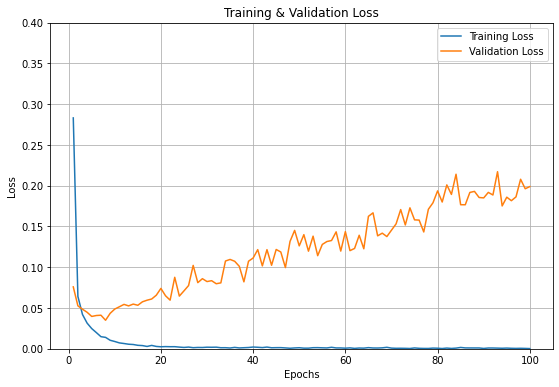

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

- Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# test data에서 accuracy = 0.9913 나옴

313/313 [==============================] - 1s 3ms/step - loss: 0.1680 - accuracy: 0.9913
Loss = 0.16802
Accuracy = 0.99130


### 
# The End
###